In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [18]:
train_df = pd.read_csv("football.csv")
print(train_df.sample(10))

    Div        Date      HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
29   E0  27/08/2018    Man United    Tottenham     0     3   A     0     0   
12   E0  18/08/2018       Everton  Southampton     2     1   H     2     0   
183  E0  26/12/2018        Fulham       Wolves     1     1   D     0     0   
20   E0  25/08/2018       Arsenal     West Ham     3     1   H     1     1   
83   E0  20/10/2018  Huddersfield    Liverpool     0     1   A     0     1   
162  E0  15/12/2018  Huddersfield    Newcastle     0     1   A     0     0   
335  E0  16/04/2019      Brighton      Cardiff     0     2   A     0     1   
294  E0  09/03/2019     Newcastle      Everton     3     2   H     0     2   
189  E0  27/12/2018   Southampton     West Ham     1     2   A     0     0   
283  E0  02/03/2019     Tottenham      Arsenal     1     1   D     0     1   

    HTR  ... BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA   PSCH  \
29    D  ...     1.79    20  -0.25     2.25     2.18     1.7

In [19]:
print(train_df.describe().T)

          count       mean       std    min      25%     50%      75%    max
FTHG      380.0   1.568421  1.312836   0.00   1.0000   1.000   2.0000   6.00
FTAG      380.0   1.252632  1.180031   0.00   0.0000   1.000   2.0000   6.00
HTHG      380.0   0.678947  0.860802   0.00   0.0000   0.000   1.0000   4.00
HTAG      380.0   0.573684  0.766958   0.00   0.0000   0.000   1.0000   3.00
HS        380.0  14.134211  5.855371   0.00  10.0000  14.000  18.0000  36.00
AS        380.0  11.144737  4.654002   2.00   8.0000  11.000  14.0000  25.00
HST       380.0   4.778947  2.677686   0.00   3.0000   5.000   6.0000  14.00
AST       380.0   3.928947  2.283982   0.00   2.0000   4.000   5.2500  12.00
HF        380.0  10.152632  3.293532   0.00   8.0000  10.000  12.0000  23.00
AF        380.0  10.305263  3.503707   3.00   8.0000  10.000  13.0000  21.00
HC        380.0   5.705263  2.971718   0.00   4.0000   5.000   8.0000  16.00
AC        380.0   4.552632  2.730627   0.00   2.7500   4.000   6.0000  14.00

In [20]:
features = ['PSCH', 'PSCD']
df_gdpp = train_df[features]
print(df_gdpp.sample(10))

      PSCH  PSCD
201   8.88  4.84
271   1.82  3.52
104   2.85  3.29
303  13.07  8.33
59    6.86  4.73
113   1.49  4.47
286   6.44  4.09
375   1.32  5.89
331   1.20  7.01
107   1.33  5.53


In [21]:
scaled_data = StandardScaler().fit_transform(df_gdpp)
print(scaled_data)

[[-5.69046892e-01 -2.51058674e-01]
 [-4.63725386e-01 -4.79139627e-01]
 [-2.27549886e-01 -5.93180104e-01]
 [ 1.24695120e+00 -3.10558053e-01]
 [ 4.49061004e-01 -5.18805880e-01]
 [-2.40316129e-01 -7.41928551e-01]
 [-2.84997981e-01 -6.67554327e-01]
 [ 3.50122619e-01 -2.21308984e-01]
 [-6.64793716e-01  1.17692642e+00]
 [-4.15851974e-01 -6.87387454e-01]
 [-2.00984342e-02 -6.77470891e-01]
 [-4.79683190e-01 -3.65099150e-01]
 [-4.76491629e-01 -4.69223064e-01]
 [-3.80744805e-01 -5.78305259e-01]
 [-6.58410594e-01  9.53803753e-01]
 [-3.93511048e-01 -4.84097909e-01]
 [ 8.19282057e-01 -4.34515093e-01]
 [-2.72231738e-01 -7.27053707e-01]
 [-7.19050250e-01  4.63780697e+00]
 [ 1.49270139e+00  3.48893399e-01]
 [-6.26494986e-01  5.32349817e-01]
 [-2.08400521e-01 -5.28722443e-01]
 [-2.78614859e-01 -7.66719959e-01]
 [-6.96709324e-01  2.43137167e+00]
 [-3.13722028e-01 -6.42762920e-01]
 [ 2.76932571e+00  6.16640604e-01]
 [-3.42446075e-01 -6.67554327e-01]
 [ 1.06184068e+00 -1.61809605e-01]
 [-3.07338906e-01 -5

In [22]:
k_means = KMeans(n_clusters=2, init='k-means++')
k_means.fit(df_gdpp)
labels = k_means.labels_
df_gdpp["CL"] = labels
df_gdpp.sample(10)

/tmp/ipykernel_881243/404172553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdpp["CL"] = labels


,PSCH,PSCD,CL
210,10.06,5.37,1
366,1.27,6.31,0
5,2.58,3.08,0
27,6.66,4.25,0
68,2.50,3.16,0
179,3.48,3.76,0
91,2.85,3.71,0
70,2.77,3.24,0
292,1.60,4.36,0
157,2.32,3.54,0


/tmp/ipykernel_881243/1920570694.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df_gdpp['PSCH'], df_gdpp['PSCD'], c=labels.astype(np.float))


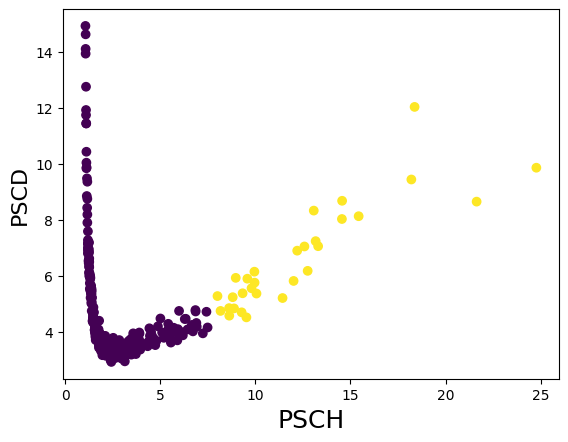

In [23]:
plt.scatter(df_gdpp['PSCH'], df_gdpp['PSCD'], c=labels.astype(np.float))
plt.xlabel('PSCH', fontsize=18)
plt.ylabel('PSCD', fontsize=16)

plt.show()